# Moving Average Crossover Stategy 

In [114]:
# Data manipulation packages
import numpy as np
import pandas as pd

# Financial packages
import talib as ta
import yfinance as yf
import pyfolio as pf

# Graphing packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

import datetime

## Import dataset

In [115]:
data = yf.download('MSFT')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064383,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400
...,...,...,...,...,...,...
2022-06-13,245.110001,249.020004,241.529999,242.259995,242.259995,46135800
2022-06-14,243.860001,245.740005,241.509995,244.490005,244.490005,28651500
2022-06-15,248.309998,255.300003,246.419998,251.759995,251.759995,33111700


## Compute Indicators

In [116]:
#indicators
sma = 5 # defining the shorter lookback period
lma = 20 # defining the longer lookback period

data['sma'] = data['Adj Close'].rolling(window=sma).mean()
data['lma'] = data['Adj Close'].rolling(window=lma).mean()

data.dropna(inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume,sma,lma
Date,,,,,,,,
1986-04-10,0.097222,0.098958,0.095486,0.098090,0.061655,13881600,0.060564,0.060455
1986-04-11,0.098958,0.101563,0.098958,0.099826,0.062746,17222400,0.061000,0.060537
1986-04-14,0.099826,0.101563,0.099826,0.100694,0.063292,12153600,0.061764,0.060537
1986-04-15,0.100694,0.100694,0.097222,0.100694,0.063292,9302400,0.062419,0.060482
1986-04-16,0.100694,0.105035,0.099826,0.104167,0.065475,31910400,0.063292,0.060618
...,...,...,...,...,...,...,...,...
2022-06-13,245.110001,249.020004,241.529999,242.259995,242.259995,46135800,260.590002,263.469617
2022-06-14,243.860001,245.740005,241.509995,244.490005,244.490005,28651500,254.988004,262.649499
2022-06-15,248.309998,255.300003,246.419998,251.759995,251.759995,33111700,251.258002,261.927498


<AxesSubplot:xlabel='Date'>

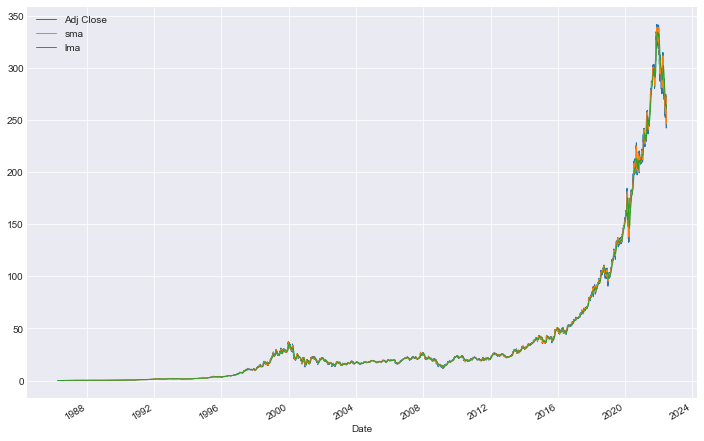

In [117]:
data[['Adj Close', 'sma', 'lma']].plot(grid=True, linewidth=1, figsize=(12, 8))

## Compute Signals

In [118]:
#signals
data['signal'] = np.where((data['sma'] > data['lma']), 1, 0)
data['signal'] = np.where((data['sma'] < data['lma']), -1, data['signal'])

data.dropna(inplace=True)
data['signal'].value_counts()

 1    5548
-1    3575
Name: signal, dtype: int64

## Compute Returns

In [119]:
# Returns
data['returns'] = data['Adj Close'].pct_change()
# Strategy returns 
data['strategy_returns'] = data['returns'].shift(-1) * data['signal']
data

,Open,High,Low,Close,Adj Close,Volume,sma,lma,signal,returns,strategy_returns
Date,,,,,,,,,,,
1986-04-10,0.097222,0.098958,0.095486,0.098090,0.061655,13881600,0.060564,0.060455,1,NaN,0.017698
1986-04-11,0.098958,0.101563,0.098958,0.099826,0.062746,17222400,0.061000,0.060537,1,0.017698,0.008696
1986-04-14,0.099826,0.101563,0.099826,0.100694,0.063292,12153600,0.061764,0.060537,1,0.008696,0.000000
1986-04-15,0.100694,0.100694,0.097222,0.100694,0.063292,9302400,0.062419,0.060482,1,0.000000,0.034490
1986-04-16,0.100694,0.105035,0.099826,0.104167,0.065475,31910400,0.063292,0.060618,1,0.034490,0.008333
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-13,245.110001,249.020004,241.529999,242.259995,242.259995,46135800,260.590002,263.469617,-1,-0.042413,-0.009205
2022-06-14,243.860001,245.740005,241.509995,244.490005,244.490005,28651500,254.988004,262.649499,-1,0.009205,-0.029735
2022-06-15,248.309998,255.300003,246.419998,251.759995,251.759995,33111700,251.258002,261.927498,-1,0.029735,0.026970


## Extract Entry/Exit Points

In [120]:
data['entry'] = data['signal'].diff()
data['entry'].value_counts()

 0.0    8565
-2.0     279
 2.0     278
Name: entry, dtype: int64

## Strategy Performance Analysis

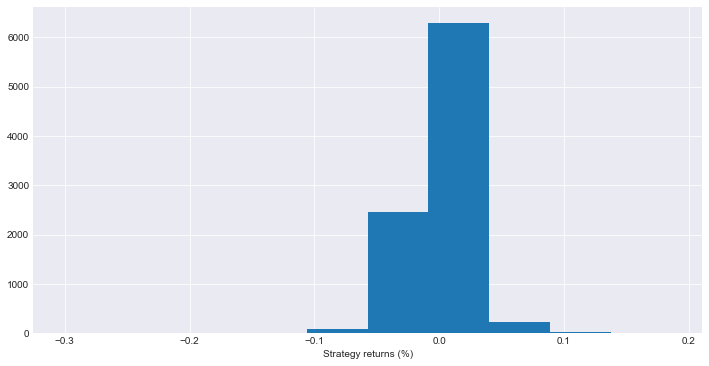

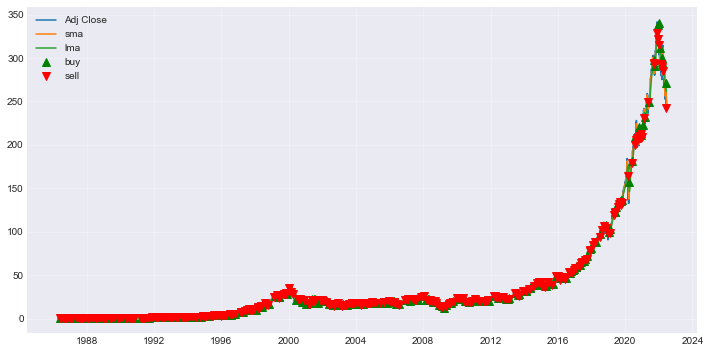

/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


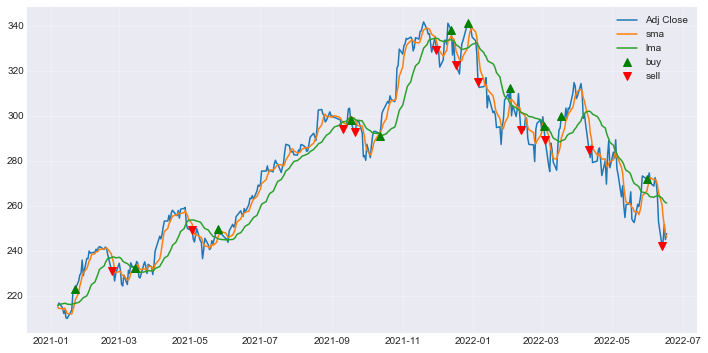

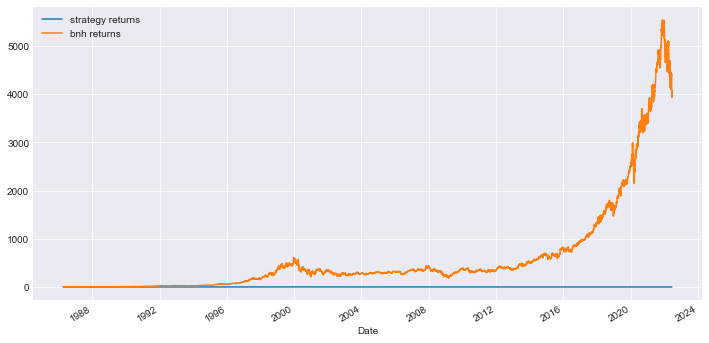

Start date,1986-04-10
End date,2022-06-17
Total months,434
,Backtest
Annual return,-3.7%
Cumulative returns,-74.0%
Annual volatility,33.9%
Sharpe ratio,0.06
Calmar ratio,-0.04
Stability,0.39
Max drawdown,-91.5%


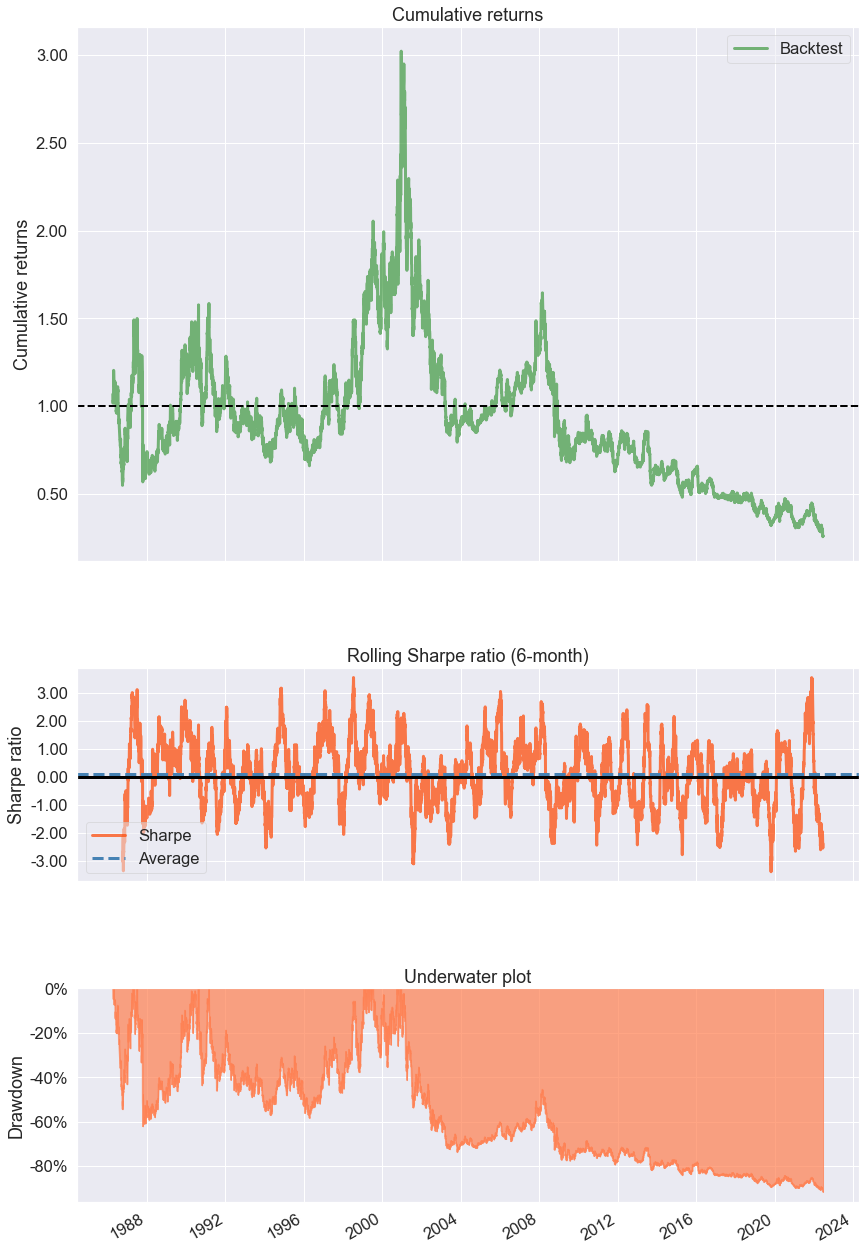

In [121]:
#Analysis

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 12, 6
data.strategy_returns.hist()
plt.xlabel('Strategy returns (%)')
plt.show()

plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(data['Adj Close'], label = 'Adj Close')
plt.plot(data['sma'], label = 'sma')
plt.plot(data['lma'], label = 'lma')
plt.plot(data[data.entry == 2].index, data['Adj Close'][data.entry == 2], '^', color = 'g', markersize = 8,label='buy')
plt.plot(data[data.entry == -2].index, data['Adj Close'][data.entry == -2], 'v',color = 'r', markersize = 8,label='sell')
plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(data['Adj Close'][-365:], label = 'Adj Close')
plt.plot(data['sma'][-365:], label = 'sma')
plt.plot(data['lma'][-365:], label = 'lma')
plt.plot(data[-365:][data.entry == 2].index, data['Adj Close'][-365:][data.entry == 2], '^', color = 'g', markersize = 8,label='buy')
plt.plot(data[-365:][data.entry == -2].index, data['Adj Close'][-365:][data.entry == -2], 'v',color = 'r', markersize = 8,label='sell')
plt.legend()
plt.show()

(data.strategy_returns+1).cumprod().plot(label='strategy returns')
(data.returns+1).cumprod().plot(label='bnh returns')
plt.legend()
plt.show()

# general analytics)
pf.create_simple_tear_sheet(data.strategy_returns)